In [2]:
#Import some things
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.coordinates import SkyCoord


In [5]:
data=Table.read('DR19_SeisAges_Sample_trainingVariation456789_cluster1819.fits')

In [6]:
data

sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,catalogid25,catalogid31,n_associated,n_neighborhood,sdss5_target_flags,sdss4_apogee_target1_flags,sdss4_apogee_target2_flags,sdss4_apogee2_target1_flags,sdss4_apogee2_target2_flags,sdss4_apogee2_target3_flags,sdss4_apogee_member_flags,sdss4_apogee_extra_target_flags,ra,dec,l,b,plx,e_plx,pmra,e_pmra,pmde,e_pmde,gaia_v_rad,gaia_e_v_rad,g_mag,bp_mag,rp_mag,j_mag,e_j_mag,h_mag,e_h_mag,k_mag,e_k_mag,ph_qual,bl_flg,cc_flg,w1_mag,e_w1_mag,w1_flux,w1_dflux,w1_frac,w2_mag,e_w2_mag,w2_flux,w2_dflux,w2_frac,w1uflags,w2uflags,w1aflags,w2aflags,mag4_5,d4_5m,rms_f4_5,sqf_4_5,mf4_5,csf,zgr_teff,zgr_e_teff,zgr_logg,zgr_e_logg,zgr_fe_h,zgr_e_fe_h,zgr_e,zgr_e_e,zgr_plx,zgr_e_plx,zgr_teff_confidence,zgr_logg_confidence,zgr_fe_h_confidence,zgr_ln_prior,zgr_chi2,zgr_quality_flags,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,bailer_jones_flags,ebv,e_ebv,ebv_flags,ebv_zhang_2023,e_ebv_zhang_2023,ebv_sfd,e_ebv_sfd,ebv_rjce_glimpse,e_ebv_rjce_glimpse,ebv_rjce_allwise,e_ebv_rjce_allwise,ebv_bayestar_2019,e_ebv_bayestar_2019,ebv_edenhofer_2023,e_ebv_edenhofer_2023,c_star,u_jkc_mag,u_jkc_mag_flag,b_jkc_mag,b_jkc_mag_flag,v_jkc_mag,v_jkc_mag_flag,r_jkc_mag,r_jkc_mag_flag,i_jkc_mag,i_jkc_mag_flag,u_sdss_mag,u_sdss_mag_flag,g_sdss_mag,g_sdss_mag_flag,r_sdss_mag,r_sdss_mag_flag,i_sdss_mag,i_sdss_mag_flag,z_sdss_mag,z_sdss_mag_flag,y_ps1_mag,y_ps1_mag_flag,n_boss_visits,boss_min_mjd,boss_max_mjd,n_apogee_visits,apogee_min_mjd,apogee_max_mjd,source,star_pk,spectrum_pk,release,filetype,apred,apstar,obj,telescope,field,prefix,min_mjd,max_mjd,n_entries,n_visits,n_good_visits,n_good_rvs,snr,mean_fiber,std_fiber,spectrum_flags,v_rad,e_v_rad,std_v_rad,median_e_v_rad,doppler_teff,doppler_e_teff,doppler_logg,doppler_e_logg,doppler_fe_h,doppler_e_fe_h,doppler_rchi2,doppler_flags,xcorr_v_rad,xcorr_v_rel,xcorr_e_v_rel,ccfwhm,autofwhm,n_components,task_pk,source_pk,v_astra,created,t_elapsed,t_overhead,tag,irfm_teff,irfm_teff_flags,teff,e_teff,logg,e_logg,v_micro,e_v_micro,v_sini,e_v_sini,m_h_atm,e_m_h_atm,alpha_m_atm,e_alpha_m_atm,c_m_atm,e_c_m_atm,n_m_atm,e_n_m_atm,al_h,e_al_h,al_h_flags,al_h_rchi2,c_12_13,e_c_12_13,c_12_13_flags,c_12_13_rchi2,ca_h,e_ca_h,ca_h_flags,ca_h_rchi2,ce_h,e_ce_h,ce_h_flags,ce_h_rchi2,c_1_h,e_c_1_h,c_1_h_flags,c_1_h_rchi2,c_h,e_c_h,c_h_flags,c_h_rchi2,co_h,e_co_h,co_h_flags,co_h_rchi2,cr_h,e_cr_h,cr_h_flags,cr_h_rchi2,cu_h,e_cu_h,cu_h_flags,cu_h_rchi2,fe_h,e_fe_h,fe_h_flags,fe_h_rchi2,k_h,e_k_h,k_h_flags,k_h_rchi2,mg_h,e_mg_h,mg_h_flags,mg_h_rchi2,mn_h,e_mn_h,mn_h_flags,mn_h_rchi2,na_h,e_na_h,na_h_flags,na_h_rchi2,nd_h,e_nd_h,nd_h_flags,nd_h_rchi2,ni_h,e_ni_h,ni_h_flags,ni_h_rchi2,n_h,e_n_h,n_h_flags,n_h_rchi2,o_h,e_o_h,o_h_flags,o_h_rchi2,p_h,e_p_h,p_h_flags,p_h_rchi2,si_h,e_si_h,si_h_flags,si_h_rchi2,s_h,e_s_h,s_h_flags,s_h_rchi2,ti_h,e_ti_h,ti_h_flags,ti_h_rchi2,ti_2_h,e_ti_2_h,ti_2_h_flags,ti_2_h_rchi2,v_h,e_v_h,v_h_flags,v_h_rchi2,short_grid_name,continuum_order,continuum_reject,interpolation_order,initial_flags,rchi2,ferre_log_snr_sq,ferre_time_elapsed,result_flags,flag_warn,flag_bad,stellar_parameters_task_pk,al_h_task_pk,c_12_13_task_pk,ca_h_task_pk,ce_h_task_pk,c_1_h_task_pk,c_h_task_pk,co_h_task_pk,cr_h_task_pk,cu_h_task_pk,fe_h_task_pk,k_h_task_pk,mg_h_task_pk,mn_h_task_pk,na_h_task_pk,nd_h_task_pk,ni_h_task_pk,n_h_task_pk,o_h_task_pk,p_h_task_pk,si_h_task_pk,s_h_task_pk,ti_h_task_pk,ti_2_h_task_pk,v_h_task_pk,calibrated_flags,mass,radius,raw_teff,raw_e_teff,raw_logg,raw_e_logg,raw_v_micro,raw_e_v_micro,raw_v_sini,raw_e_v_sini,raw_m_h_atm,raw_e_m_h_atm,raw_alpha_m_atm,raw_e_alpha_m_atm,raw_c_m_atm,raw_e_c_m_atm,raw_n_m_atm,raw_e_n_m_atm,raw_al_h,raw_e_al_h,raw_c_12_13,raw_e_c_12_13,raw_ca_h,raw_e_ca_h,raw_ce_h,raw_e_ce_h,raw_c_1_h,raw_e_c_1_h,raw_c_h,raw_e_c_h,raw_co_h,raw_e_co_h,raw_cr_h,raw_e_cr_h,raw_cu_h,raw_e_cu_h,raw_fe_h,raw_e_fe_h,raw_k_h,raw_e_k_h,raw_mg_h,raw_e_mg_h,raw_mn_h,raw_e_mn

In [35]:
good=np.where(data['OpenCluster_Name'].astype('str')=='NGC_2682')

In [34]:
#print(np.unique(np.array(data['OpenCluster_Name'])))

[b'-9999' b'BH_211' b'Berkeley_10' b'Berkeley_13' b'Berkeley_17'
 b'Berkeley_18' b'Berkeley_19' b'Berkeley_2' b'Berkeley_20' b'Berkeley_21'
 b'Berkeley_22' b'Berkeley_27' b'Berkeley_29' b'Berkeley_31'
 b'Berkeley_32' b'Berkeley_33' b'Berkeley_36' b'Berkeley_39'
 b'Berkeley_44' b'Berkeley_53' b'Berkeley_64' b'Berkeley_66'
 b'Berkeley_67' b'Berkeley_71' b'Berkeley_75' b'Berkeley_77'
 b'Berkeley_85' b'Berkeley_9' b'Berkeley_98' b'COIN-Gaia_25'
 b'Collinder_220' b'Collinder_261' b'Czernik_20' b'Czernik_21'
 b'Czernik_23' b'Czernik_30' b'Czernik_9' b'FSR_0494' b'FSR_0496'
 b'FSR_0553' b'FSR_0667' b'FSR_0716' b'FSR_0893' b'FSR_0941' b'FSR_0942'
 b'FSR_0951' b'FSR_0974' b'FSR_1083' b'FSR_1113' b'FSR_1595' b'Haffner_4'
 b'Haffner_6' b'IC_1369' b'IC_166' b'IC_361' b'King_1' b'King_13'
 b'King_15' b'King_2' b'King_23' b'King_5' b'King_7' b'King_8'
 b'Melotte_71' b'Melotte_72' b'NGC_1193' b'NGC_1245' b'NGC_136'
 b'NGC_1664' b'NGC_1798' b'NGC_1817' b'NGC_1857' b'NGC_188' b'NGC_1907'
 b'NGC_1912' b

In [36]:
data[good]

sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,catalogid25,catalogid31,n_associated,n_neighborhood,sdss5_target_flags,sdss4_apogee_target1_flags,sdss4_apogee_target2_flags,sdss4_apogee2_target1_flags,sdss4_apogee2_target2_flags,sdss4_apogee2_target3_flags,sdss4_apogee_member_flags,sdss4_apogee_extra_target_flags,ra,dec,l,b,plx,e_plx,pmra,e_pmra,pmde,e_pmde,gaia_v_rad,gaia_e_v_rad,g_mag,bp_mag,rp_mag,j_mag,e_j_mag,h_mag,e_h_mag,k_mag,e_k_mag,ph_qual,bl_flg,cc_flg,w1_mag,e_w1_mag,w1_flux,w1_dflux,w1_frac,w2_mag,e_w2_mag,w2_flux,w2_dflux,w2_frac,w1uflags,w2uflags,w1aflags,w2aflags,mag4_5,d4_5m,rms_f4_5,sqf_4_5,mf4_5,csf,zgr_teff,zgr_e_teff,zgr_logg,zgr_e_logg,zgr_fe_h,zgr_e_fe_h,zgr_e,zgr_e_e,zgr_plx,zgr_e_plx,zgr_teff_confidence,zgr_logg_confidence,zgr_fe_h_confidence,zgr_ln_prior,zgr_chi2,zgr_quality_flags,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,bailer_jones_flags,ebv,e_ebv,ebv_flags,ebv_zhang_2023,e_ebv_zhang_2023,ebv_sfd,e_ebv_sfd,ebv_rjce_glimpse,e_ebv_rjce_glimpse,ebv_rjce_allwise,e_ebv_rjce_allwise,ebv_bayestar_2019,e_ebv_bayestar_2019,ebv_edenhofer_2023,e_ebv_edenhofer_2023,c_star,u_jkc_mag,u_jkc_mag_flag,b_jkc_mag,b_jkc_mag_flag,v_jkc_mag,v_jkc_mag_flag,r_jkc_mag,r_jkc_mag_flag,i_jkc_mag,i_jkc_mag_flag,u_sdss_mag,u_sdss_mag_flag,g_sdss_mag,g_sdss_mag_flag,r_sdss_mag,r_sdss_mag_flag,i_sdss_mag,i_sdss_mag_flag,z_sdss_mag,z_sdss_mag_flag,y_ps1_mag,y_ps1_mag_flag,n_boss_visits,boss_min_mjd,boss_max_mjd,n_apogee_visits,apogee_min_mjd,apogee_max_mjd,source,star_pk,spectrum_pk,release,filetype,apred,apstar,obj,telescope,field,prefix,min_mjd,max_mjd,n_entries,n_visits,n_good_visits,n_good_rvs,snr,mean_fiber,std_fiber,spectrum_flags,v_rad,e_v_rad,std_v_rad,median_e_v_rad,doppler_teff,doppler_e_teff,doppler_logg,doppler_e_logg,doppler_fe_h,doppler_e_fe_h,doppler_rchi2,doppler_flags,xcorr_v_rad,xcorr_v_rel,xcorr_e_v_rel,ccfwhm,autofwhm,n_components,task_pk,source_pk,v_astra,created,t_elapsed,t_overhead,tag,irfm_teff,irfm_teff_flags,teff,e_teff,logg,e_logg,v_micro,e_v_micro,v_sini,e_v_sini,m_h_atm,e_m_h_atm,alpha_m_atm,e_alpha_m_atm,c_m_atm,e_c_m_atm,n_m_atm,e_n_m_atm,al_h,e_al_h,al_h_flags,al_h_rchi2,c_12_13,e_c_12_13,c_12_13_flags,c_12_13_rchi2,ca_h,e_ca_h,ca_h_flags,ca_h_rchi2,ce_h,e_ce_h,ce_h_flags,ce_h_rchi2,c_1_h,e_c_1_h,c_1_h_flags,c_1_h_rchi2,c_h,e_c_h,c_h_flags,c_h_rchi2,co_h,e_co_h,co_h_flags,co_h_rchi2,cr_h,e_cr_h,cr_h_flags,cr_h_rchi2,cu_h,e_cu_h,cu_h_flags,cu_h_rchi2,fe_h,e_fe_h,fe_h_flags,fe_h_rchi2,k_h,e_k_h,k_h_flags,k_h_rchi2,mg_h,e_mg_h,mg_h_flags,mg_h_rchi2,mn_h,e_mn_h,mn_h_flags,mn_h_rchi2,na_h,e_na_h,na_h_flags,na_h_rchi2,nd_h,e_nd_h,nd_h_flags,nd_h_rchi2,ni_h,e_ni_h,ni_h_flags,ni_h_rchi2,n_h,e_n_h,n_h_flags,n_h_rchi2,o_h,e_o_h,o_h_flags,o_h_rchi2,p_h,e_p_h,p_h_flags,p_h_rchi2,si_h,e_si_h,si_h_flags,si_h_rchi2,s_h,e_s_h,s_h_flags,s_h_rchi2,ti_h,e_ti_h,ti_h_flags,ti_h_rchi2,ti_2_h,e_ti_2_h,ti_2_h_flags,ti_2_h_rchi2,v_h,e_v_h,v_h_flags,v_h_rchi2,short_grid_name,continuum_order,continuum_reject,interpolation_order,initial_flags,rchi2,ferre_log_snr_sq,ferre_time_elapsed,result_flags,flag_warn,flag_bad,stellar_parameters_task_pk,al_h_task_pk,c_12_13_task_pk,ca_h_task_pk,ce_h_task_pk,c_1_h_task_pk,c_h_task_pk,co_h_task_pk,cr_h_task_pk,cu_h_task_pk,fe_h_task_pk,k_h_task_pk,mg_h_task_pk,mn_h_task_pk,na_h_task_pk,nd_h_task_pk,ni_h_task_pk,n_h_task_pk,o_h_task_pk,p_h_task_pk,si_h_task_pk,s_h_task_pk,ti_h_task_pk,ti_2_h_task_pk,v_h_task_pk,calibrated_flags,mass,radius,raw_teff,raw_e_teff,raw_logg,raw_e_logg,raw_v_micro,raw_e_v_micro,raw_v_sini,raw_e_v_sini,raw_m_h_atm,raw_e_m_h_atm,raw_alpha_m_atm,raw_e_alpha_m_atm,raw_c_m_atm,raw_e_c_m_atm,raw_n_m_atm,raw_e_n_m_atm,raw_al_h,raw_e_al_h,raw_c_12_13,raw_e_c_12_13,raw_ca_h,raw_e_ca_h,raw_ce_h,raw_e_ce_h,raw_c_1_h,raw_e_c_1_h,raw_c_h,raw_e_c_h,raw_co_h,raw_e_co_h,raw_cr_h,raw_e_cr_h,raw_cu_h,raw_e_cu_h,raw_fe_h,raw_e_fe_h,raw_k_h,raw_e_k_h,raw_mg_h,raw_e_mg_h,raw_mn_h,raw_e_mn

0.4666826607908783


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

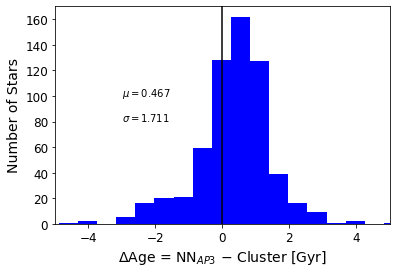

In [56]:
#borrowing bits from Lara Tunca
agecolumn='EP_AP3_training_Age'
baseage='Cluster_CG20_Age'
good=np.where((data[agecolumn]>0)& (data[baseage]>0))
delta_age=(data[agecolumn][good]-data[baseage][good]).ravel()
plt.text(-3, 100, '$\mu=$'+str('%.3f'%(np.mean(delta_age))))
plt.text(-3, 80, '$\sigma=$'+str('%.3f'%(np.std(delta_age))))
plt.hist(delta_age, bins=40, color='blue')
plt.xlabel(r'$\Delta$Age = NN$_{AP3}$ $-$ Cluster [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.axvline(0.0, color='k', linewidth=1.5)
plt.xlim([-5,5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

2.4551080639279976


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

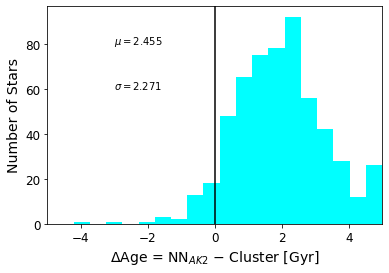

In [57]:
#borrowing bits from Lara Tunca
agecolumn='EP_AK2_training_Age'
baseage='Cluster_CG20_Age'
good=np.where((data[agecolumn]>0)& (data[baseage]>0))
delta_age=(data[agecolumn][good]-data[baseage][good]).ravel()
plt.text(-3, 80, '$\mu=$'+str('%.3f'%(np.mean(delta_age))))
plt.text(-3, 60, '$\sigma=$'+str('%.3f'%(np.std(delta_age))))
plt.hist(delta_age, bins=40, color='cyan')
plt.xlabel(r'$\Delta$Age = NN$_{AK2}$ $-$ Cluster [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.axvline(0.0, color='k', linewidth=1.5)
plt.xlim([-5,5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000')])

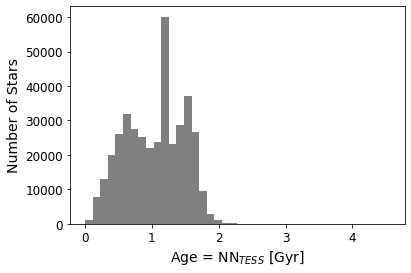

In [37]:
#borrowing bits from Lara Tunca
agecolumn='ZS_TESS_training_Age'
good=np.where((data[agecolumn]>0))
delta_age=(data[agecolumn][good]).ravel()
plt.hist(delta_age, bins=40, color='grey')
plt.xlabel(r'Age = NN$_{TESS}$ [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

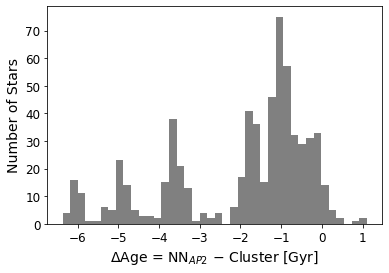

In [15]:
#borrowing bits from Lara Tunca
agecolumn='ZS_AP2_training_Age'
baseage='Cluster_CG20_Age'
good=np.where((data[agecolumn]>0)& (data[baseage]>0))
delta_age=(data[agecolumn][good]-data[baseage][good]).ravel()
plt.hist(delta_age, bins=40, color='grey')
plt.xlabel(r'$\Delta$Age = NN$_{AP2}$ $-$ Cluster [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

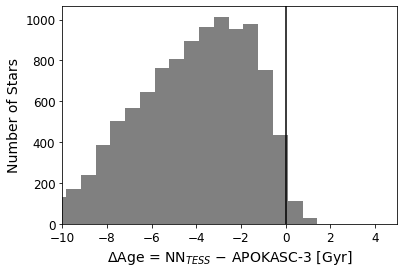

In [24]:
#borrowing bits from Lara Tunca
agecolumn='ZS_TESS_training_Age'
baseage='APOKASC3_Age_P25'
good=np.where((data[agecolumn]>0)& (data[baseage]>0))
delta_age=(data[agecolumn][good]-data[baseage][good]).ravel()
plt.axvline(0.0, color='k', linewidth=1.5)
plt.hist(delta_age, bins=100, color='grey')
plt.xlabel(r'$\Delta$Age = NN$_{TESS}$ $-$ APOKASC-3 [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.xlim([-10,5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

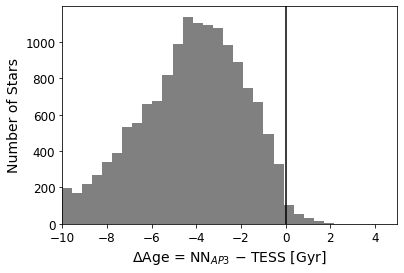

In [20]:
#borrowing bits from Lara Tunca
agecolumn='HK_AP3_training_Age'
baseage='TESS_Age_T25'
good=np.where((data[agecolumn]>0)& (data[baseage]>0))
delta_age=(data[agecolumn][good]-data[baseage][good]).ravel()
plt.axvline(0.0, color='k', linewidth=1.5)
plt.hist(delta_age, bins=100, color='grey')
plt.xlabel(r'$\Delta$Age = NN$_{AP3}$ $-$ TESS [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.xlim([-10,5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [25]:
print(data[agecolumn][good][0:5], data[baseage][good][0:5], data['tic_v8_id'][good][0:5])  

ZS_TESS_training_Age
--------------------
          0.33939782
          0.40360653
           0.3252831
             0.54091
           0.7033354 APOKASC3_Age_P25
----------------
          1.4097
          1.1594
          0.5842
          3.1325
          2.8815 tic_v8_id
---------
139037072
139103680
122784820
122784748
137099544
